# Packages

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

# Data preparing

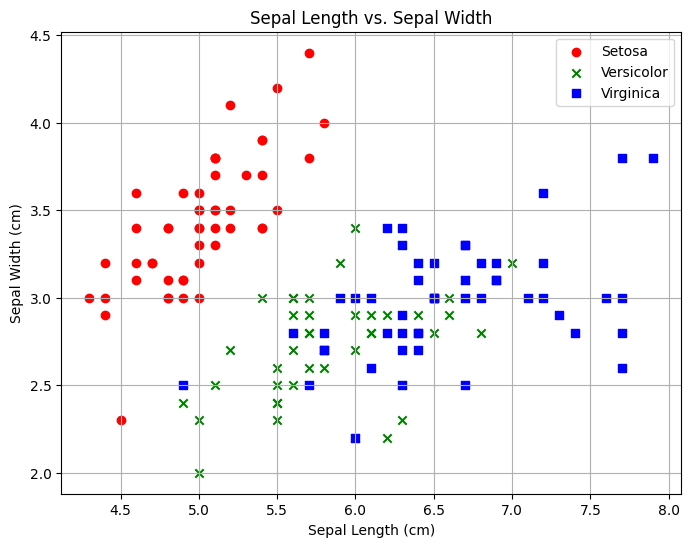

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [143]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the 'class' column to the DataFrame
df['class'] = iris.target_names[iris.target]

plt.figure(figsize=(8, 6))
plt.scatter(df[df['class'] == 'setosa']['sepal length (cm)'],
            df[df['class'] == 'setosa']['sepal width (cm)'],
            label='Setosa', color='r', marker='o')
plt.scatter(df[df['class'] == 'versicolor']['sepal length (cm)'],
            df[df['class'] == 'versicolor']['sepal width (cm)'],
            label='Versicolor', color='g', marker='x')
plt.scatter(df[df['class'] == 'virginica']['sepal length (cm)'],
            df[df['class'] == 'virginica']['sepal width (cm)'],
            label='Virginica', color='b', marker='s')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs. Sepal Width')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Display the DataFrame
df

In [144]:
x= df.iloc[:, :-1]
y= df.iloc[:, -1]

In [145]:
# split the data into train and test sets
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   )
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)
x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

x_train_np = np.array(x_train)
x_test_np = np.array(x_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)


for i in range(10):
  print(x_train_np[i])

for i in range(10):
  print(y_train_np[i])



[4.9 3.  1.4 0.2]
[5.4 3.9 1.3 0.4]
[5.8 2.6 4.  1.2]
[5.4 3.4 1.7 0.2]
[5.7 2.5 5.  2. ]
[4.9 3.1 1.5 0.1]
[6.3 2.3 4.4 1.3]
[6.2 2.9 4.3 1.3]
[5.8 2.7 3.9 1.2]
[5.5 2.6 4.4 1.2]
setosa
setosa
versicolor
setosa
virginica
setosa
versicolor
versicolor
versicolor
versicolor


# Feature Scaling

In [146]:
def scaling(arr):
  mean = arr.mean(axis = 0)
  std = arr.std(axis=0)
  return (arr - mean) / std


In [147]:
X = scaling(x_train_np)
Y = y_train_np
X_test = scaling(x_test_np)
Y_test = y_test_np
x_train_np.shape
for i in range(10):
  print(X[i])

[-1.16614642 -0.1459225  -1.37123359 -1.3486543 ]
[-0.56812262  2.04291497 -1.42758566 -1.08720274]
[-0.08970357 -1.11873915  0.09392011 -0.0413965 ]
[-0.56812262  0.82689415 -1.2021774  -1.3486543 ]
[-0.20930833 -1.36194331  0.65744076  1.00440974]
[-1.16614642  0.09728167 -1.31488153 -1.47938008]
[ 0.50832024 -1.84835164  0.31932837  0.08932928]
[ 0.38871547 -0.38912666  0.26297631  0.08932928]
[-0.08970357 -0.87553499  0.03756804 -0.0413965 ]
[-0.44851785 -1.11873915  0.31932837 -0.0413965 ]


# Model

In [148]:
import numpy as np
from scipy import stats

class KNN:
    def __init__(self, X, Y, k):
        self.X = X
        self.Y = Y
        self.k = k

    def distance(self, point):
        return np.sqrt(np.sum((self.X - point)**2, axis=1))

    def cost(self):
        cost = 0
        for i in range(len(self.X)):
            point = self.X[i]
            pred_label = self.predict(point)
            actl_label = self.Y[i]
            if pred_label != actl_label:
                cost += 1
        return cost

    def first_k_min_distances_index(self, array):
        return np.argsort(array)[:self.k]

    def predict(self, point):
        dis = self.distance(point)
        min_indices = self.first_k_min_distances_index(dis)
        labels = self.Y[min_indices]

        # Use np.unique to find the mode
        unique_labels, counts = np.unique(labels, return_counts=True)
        mode_label = unique_labels[np.argmax(counts)]

        return mode_label


In [149]:
best_model = None
min_cost =  float('inf')
for i in range(1, 20):
  model = KNN(X, Y, i)
  cost = model.cost()
  print("k = " + str(i) + " has a cost of " + str(cost))
  if (cost < min_cost):
    min_cost = cost
    best_model = model

best_model.k

k = 1 has a cost of 0
k = 2 has a cost of 4
k = 3 has a cost of 6
k = 4 has a cost of 6
k = 5 has a cost of 5
k = 6 has a cost of 6
k = 7 has a cost of 4
k = 8 has a cost of 6
k = 9 has a cost of 6
k = 10 has a cost of 7
k = 11 has a cost of 6
k = 12 has a cost of 5
k = 13 has a cost of 5
k = 14 has a cost of 4
k = 15 has a cost of 7
k = 16 has a cost of 6
k = 17 has a cost of 6
k = 18 has a cost of 6
k = 19 has a cost of 7


1

# Test

In [150]:
l = len(X_test)
correct = 0
for i in range(l):
  data = X_test[i]
  pred_label = best_model.predict(data)
  true_label = Y_test[i]
  if (pred_label == true_label):
    correct = correct + 1
  print("Prediction: " + str(pred_label) + " | Real: " + str(true_label))
accuracy = (correct) / l
print("Accuracy is " + str(accuracy * 100))

Prediction: setosa | Real: setosa
Prediction: setosa | Real: setosa
Prediction: virginica | Real: virginica
Prediction: versicolor | Real: versicolor
Prediction: versicolor | Real: versicolor
Prediction: setosa | Real: setosa
Prediction: setosa | Real: setosa
Prediction: setosa | Real: setosa
Prediction: versicolor | Real: versicolor
Prediction: versicolor | Real: versicolor
Prediction: setosa | Real: setosa
Prediction: setosa | Real: setosa
Prediction: versicolor | Real: versicolor
Prediction: virginica | Real: virginica
Prediction: setosa | Real: setosa
Prediction: virginica | Real: versicolor
Prediction: versicolor | Real: versicolor
Prediction: setosa | Real: setosa
Prediction: setosa | Real: setosa
Prediction: versicolor | Real: versicolor
Prediction: setosa | Real: setosa
Prediction: virginica | Real: virginica
Prediction: virginica | Real: virginica
Prediction: versicolor | Real: versicolor
Prediction: virginica | Real: virginica
Prediction: virginica | Real: versicolor
Predicti